# Importing required packages

In [1]:
import numpy as np
from skimage import io
import glob
import ntpath

import cv2

from matplotlib import pyplot as plt

In [2]:
def affine_transform(pts1, pts2):
    # Compute the affine transformation using homogenous coordinates
    hom_pts1 = np.vstack([pts1, np.ones(len(pts1.T))])
    hom_pts2 = np.vstack([pts2, np.ones(len(pts2.T))])
    affine_mat = np.linalg.lstsq(hom_pts1.T, hom_pts2.T, rcond=None)[0]
    return affine_mat.T


def apply_affine_transform(affine_mat, pts):
    hom_pts = np.vstack([pts, np.ones(len(pts.T))])
    tmp = np.matmul(affine_mat, hom_pts)
    out_pts = np.array([x[:-1] / x[-1] for x in tmp.T])
    return out_pts.T


def linear_transform(pts1, pts2):
    # Compute the linear transformation using coordinates
    linear_mat = np.linalg.lstsq(pts1.T, pts2.T, rcond=None)[0]
    return linear_mat.T


def apply_linear_transform(linear_mat, pts):
    tmp = np.matmul(linear_mat, pts)
    out_pts = np.array([x for x in tmp.T])
    return out_pts.T


def min_max_normalise(x, low=0, high=1, minv=None, maxv=None):
    if minv is None:
        minv = x.min()
    if maxv is None:
        maxv = x.max()
    output = low + (x - minv) * (high - low) / (maxv - minv)
    return output


def demo_image(all_org_ims, img_ind, lesion_ind, figsize=(15,5)):
    lesion_code = list('11111111')
    lesion_code[lesion_ind] = '0'
    lesion_name = 'zro_' + ''.join(e for e in lesion_code)
    
    img_org_path = all_org_ims[img_ind]
    img_les_path = all_org_ims[img_ind].replace('ful_11111111', lesion_name)

    # reading the images
    img_org = io.imread(img_org_path)
    img_les = io.imread(img_les_path)

    # cevtorising it and converting it to Lab
    img_org_vec = img_org.astype('float32') / 255
    img_org_vec = cv2.cvtColor(img_org_vec, cv2.COLOR_RGB2LAB)
    img_org_vec = img_org_vec.reshape((img_org.shape[0] * img_org.shape[1], 3))
    img_les_vec = img_les.astype('float32') / 255
    img_les_vec = cv2.cvtColor(img_les_vec, cv2.COLOR_RGB2LAB)
    img_les_vec = img_les_vec.reshape((img_les.shape[0] * img_les.shape[1], 3))

    # computing the linear transformation
    lin_mat = linear_transform(img_org_vec.T, img_les_vec.T)
    recovered = apply_linear_transform(lin_mat, img_org_vec.T)
    img_rec = recovered.T.reshape((img_org.shape[0], img_org.shape[1], 3)).astype('float32')
    img_rec = cv2.cvtColor(img_rec, cv2.COLOR_LAB2RGB)
    error = (np.sum(((img_les.astype('float') / 255) - img_rec) ** 2, axis=2) ** 0.5).mean()

    img_org = cv2.resize(img_org, (150, 100))
    img_les = cv2.resize(img_les, (150, 100))
    img_rec = cv2.resize(img_rec, (150, 100))
    
    fig = plt.figure(figsize=figsize)
    # displaying the full reconstruction    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(img_org)
    ax.set_title('Full reconstruction', fontsize=18)
    ax.axis('off')

    # displaying the lesion reconstruction
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(img_les)
    ax.set_title('Lesion vector %d' % lesion_ind, fontsize=18)
    ax.axis('off')

    # displaying the lesion reconstruction
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(img_rec)
    ax.set_title('Linear model (error=%.2f)' % error, fontsize=18)
    ax.axis('off')

# Setting up the director of images

## rgb2dkl

In [3]:
# replace this with the path to directory where lesion_imgs.zip is unzipped
imgs_dir = '/mnt/hdd/Results/lesion_imgs/ful_11111111/rgb2dkl/'
all_org_ims = sorted(glob.glob(imgs_dir + '*.jpg'))

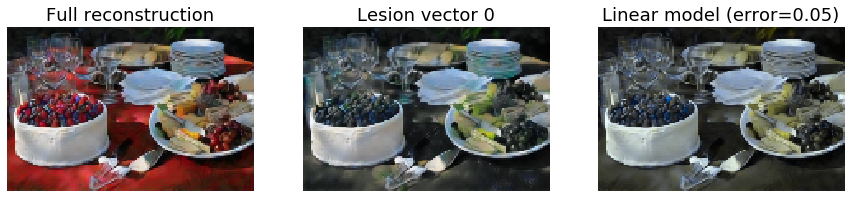

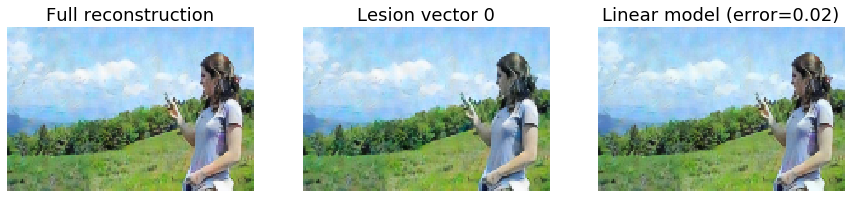

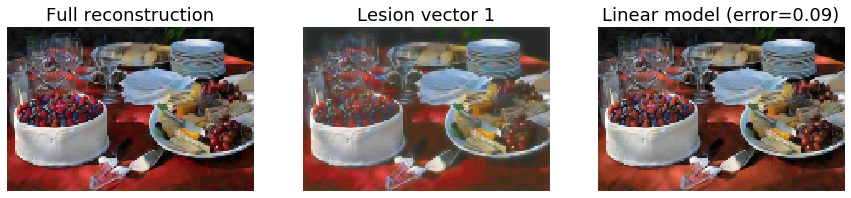

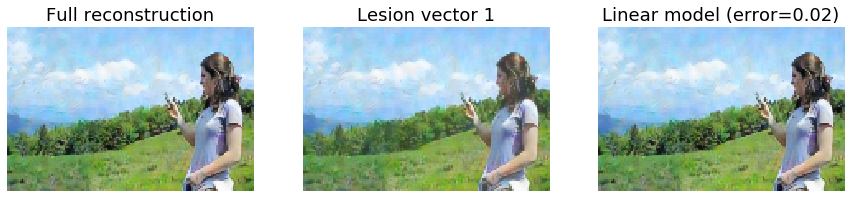

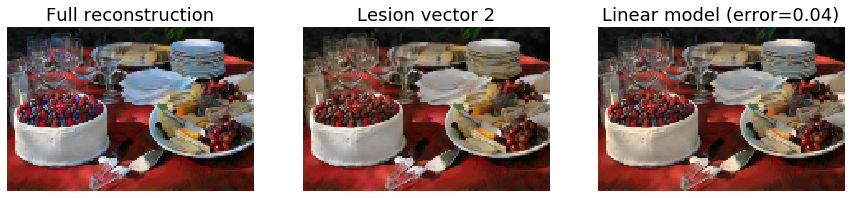

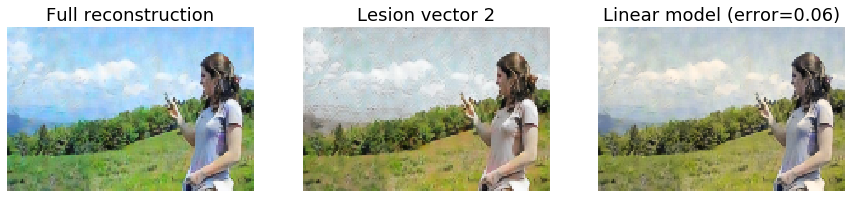

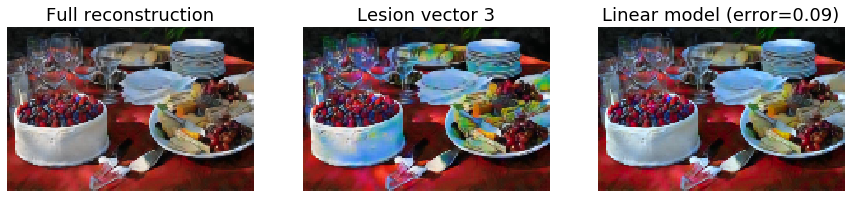

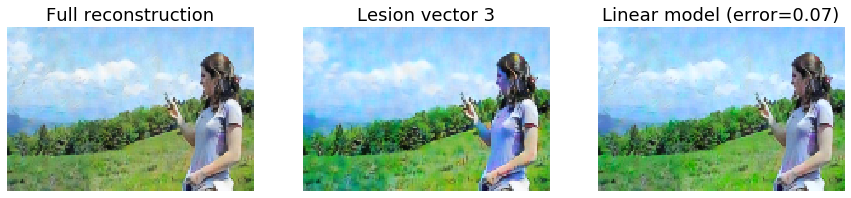

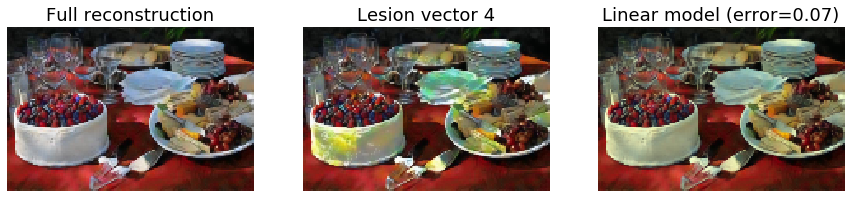

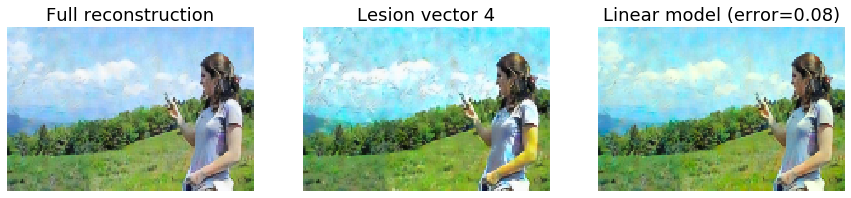

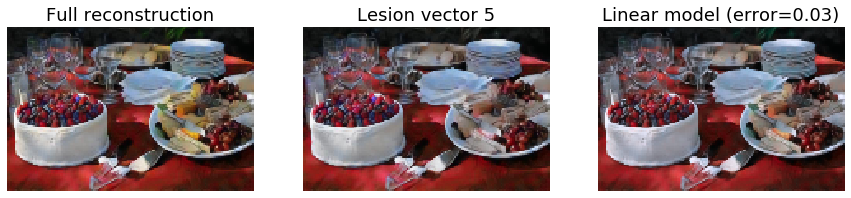

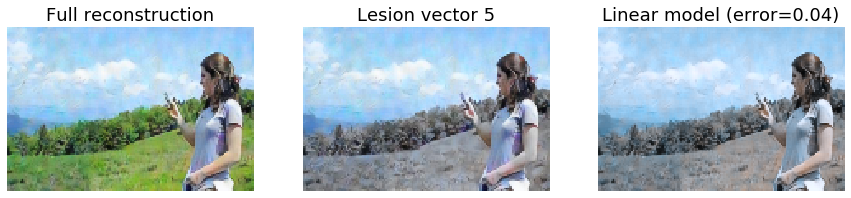

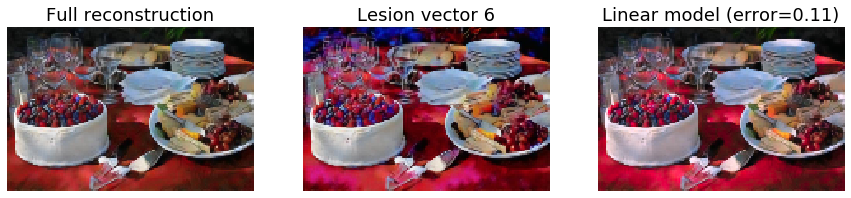

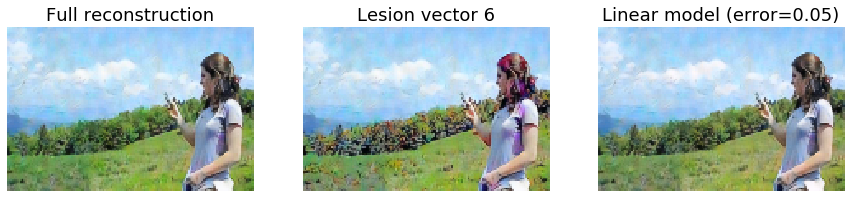

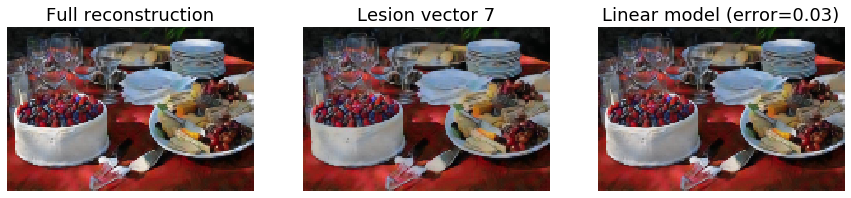

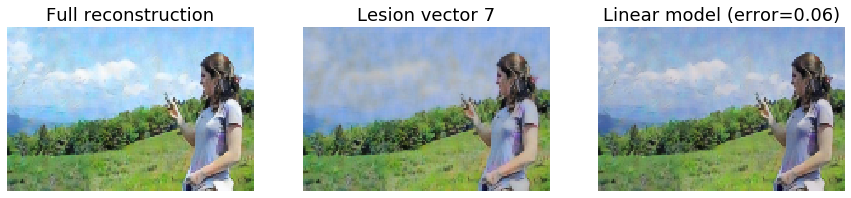

In [4]:
which_imgs = [25, -5]
for v in range(8):
    for i in which_imgs:
        current_fig = demo_image(all_org_ims, i, lesion_ind=v, figsize=(15,5))

## rgb2lab

In [5]:
# replace this with the path to directory where lesion_imgs.zip is unzipped
imgs_dir = '/mnt/hdd/Results/lesion_imgs/ful_11111111/rgb2lab/'
all_org_ims = sorted(glob.glob(imgs_dir + '*.jpg'))

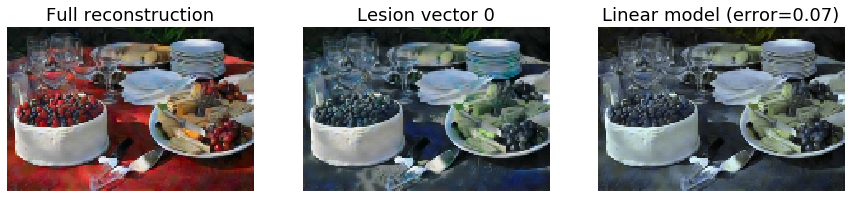

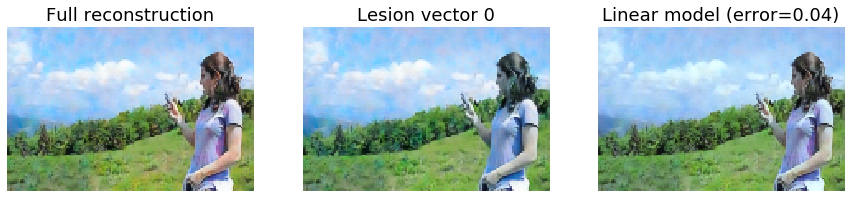

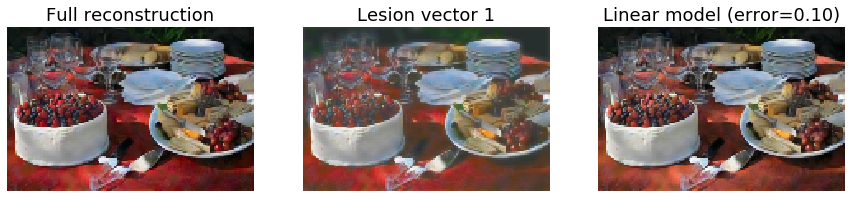

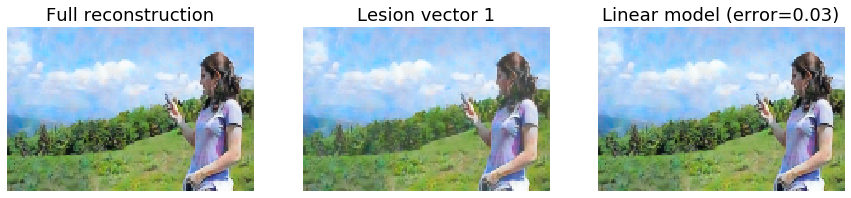

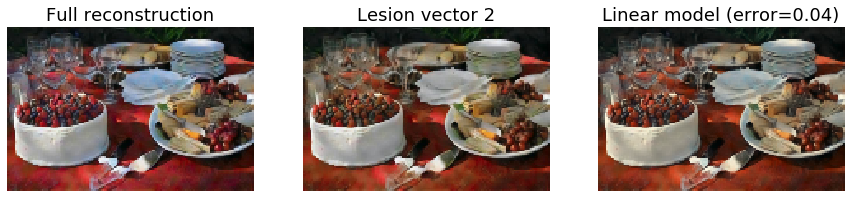

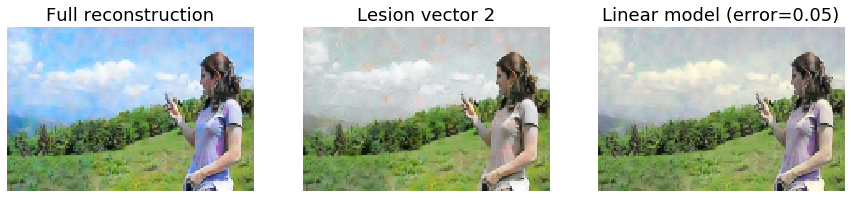

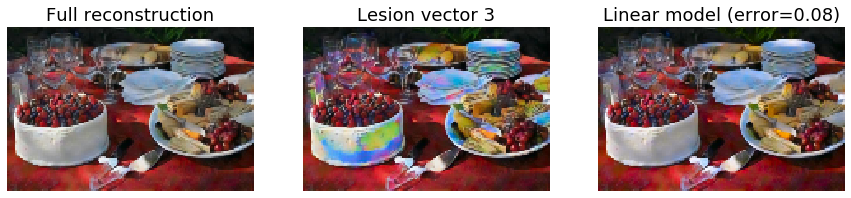

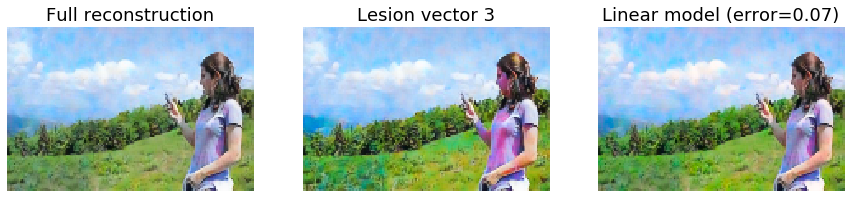

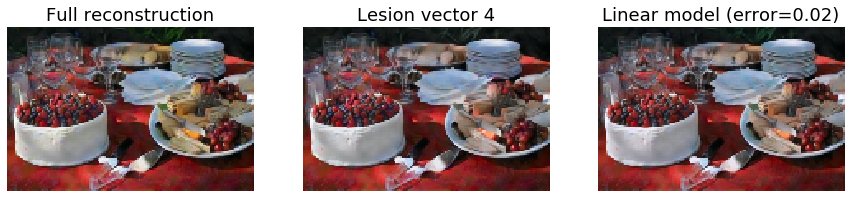

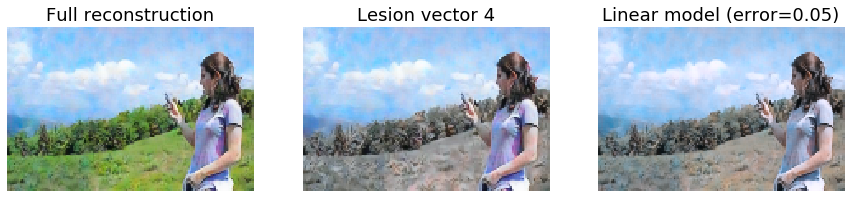

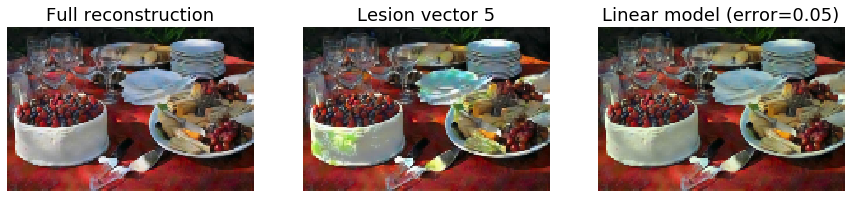

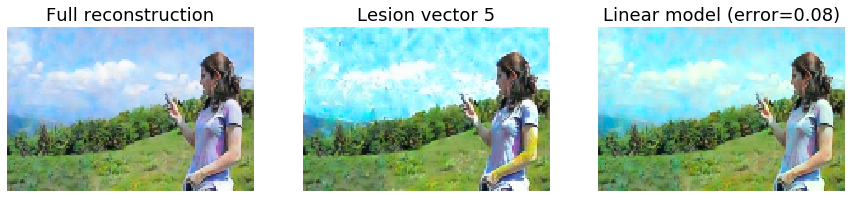

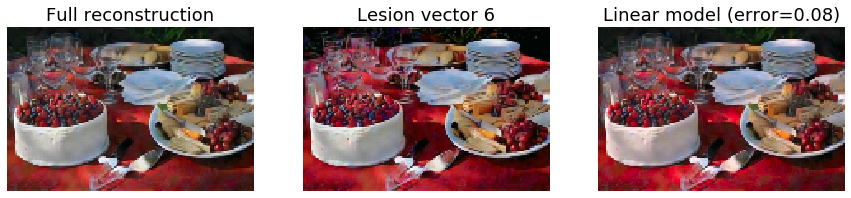

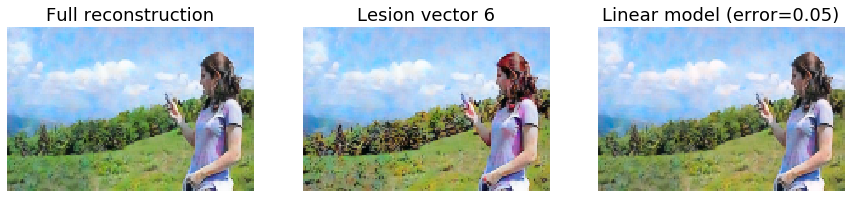

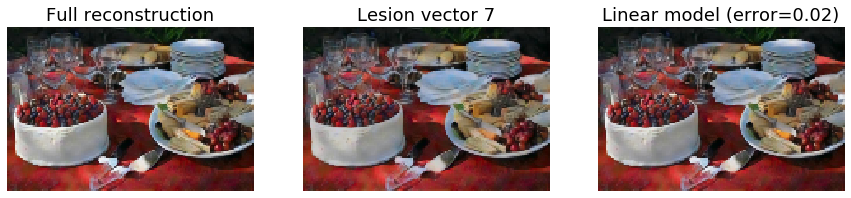

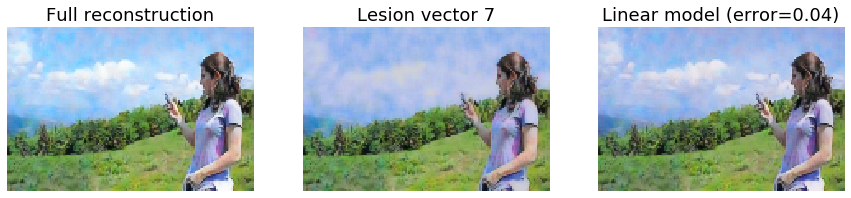

In [6]:
which_imgs = [25, -5]
for v in range(8):
    for i in which_imgs:
        current_fig = demo_image(all_org_ims, i, lesion_ind=v, figsize=(15,5))

## rgb2rgb

In [7]:
# replace this with the path to directory where lesion_imgs.zip is unzipped
imgs_dir = '/mnt/hdd/Results/lesion_imgs/ful_11111111/rgb2rgb/'
all_org_ims = sorted(glob.glob(imgs_dir + '*.jpg'))

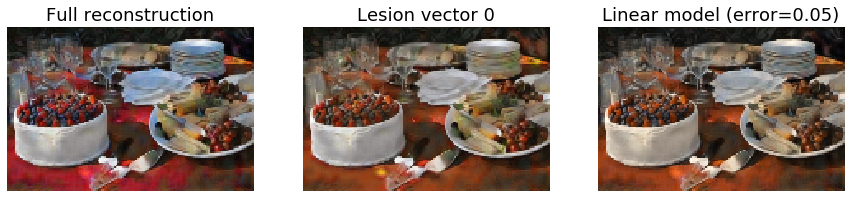

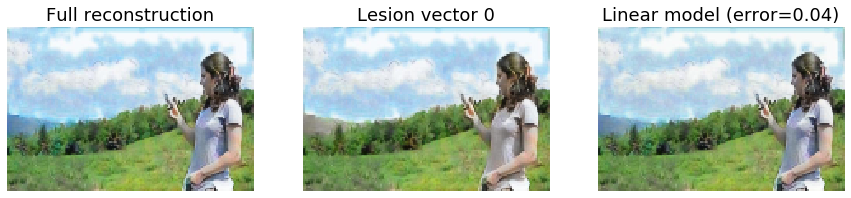

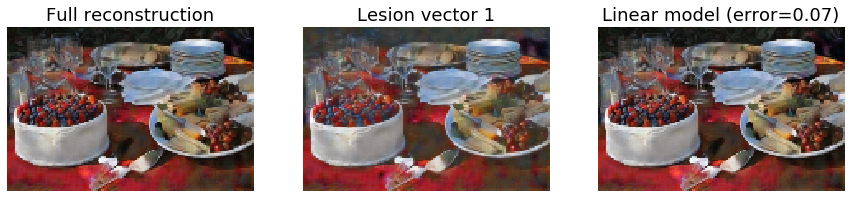

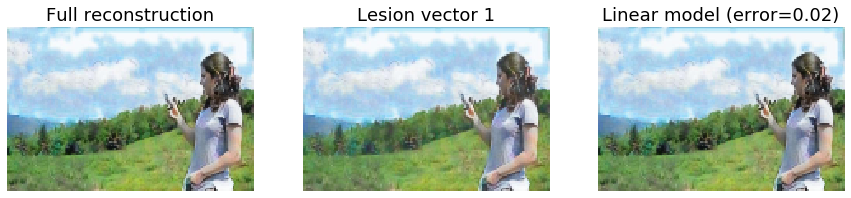

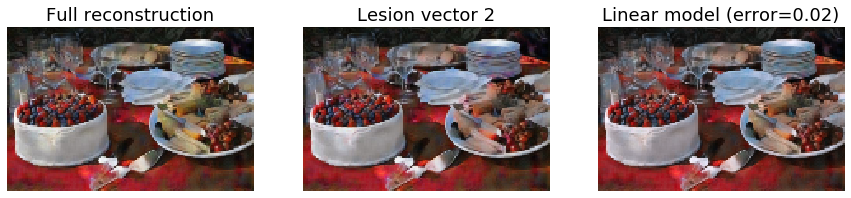

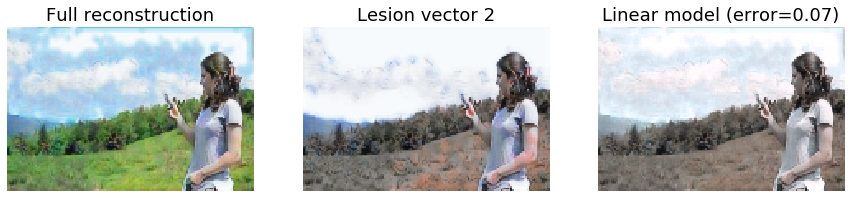

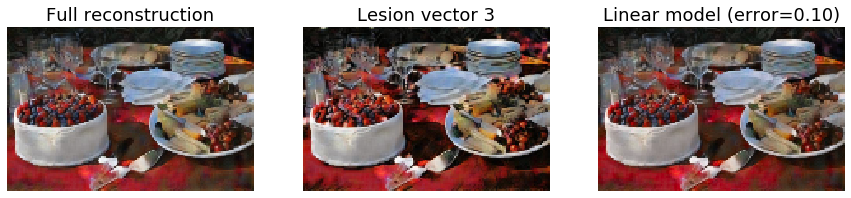

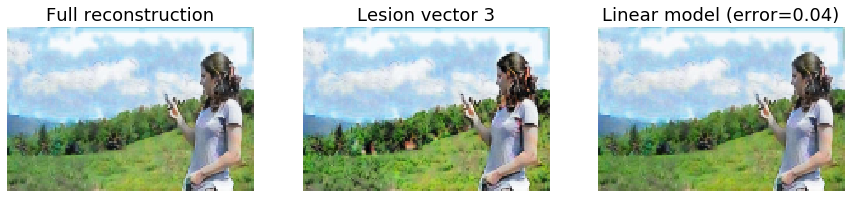

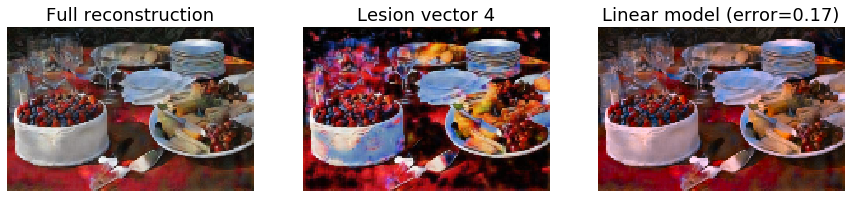

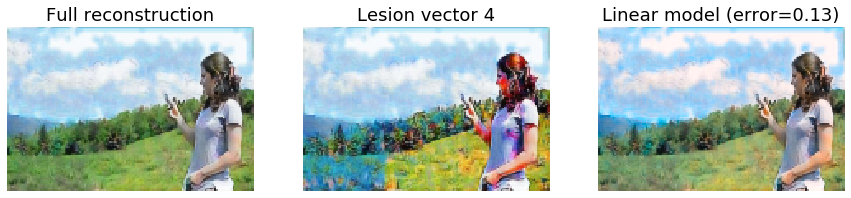

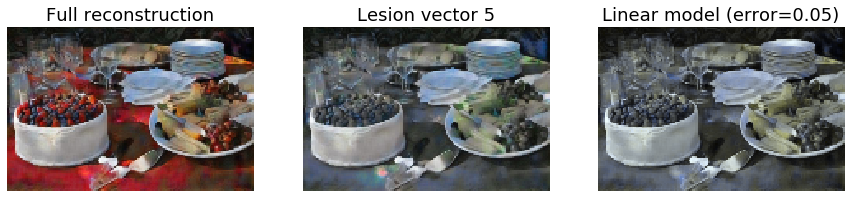

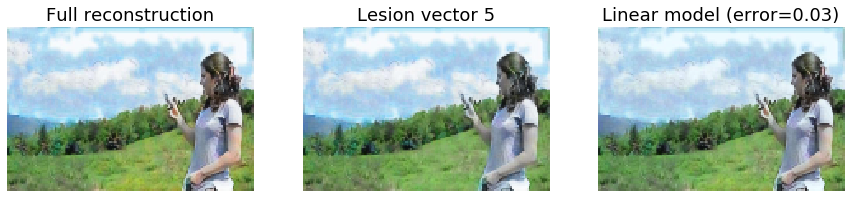

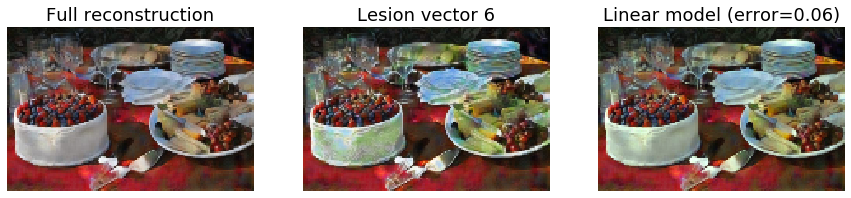

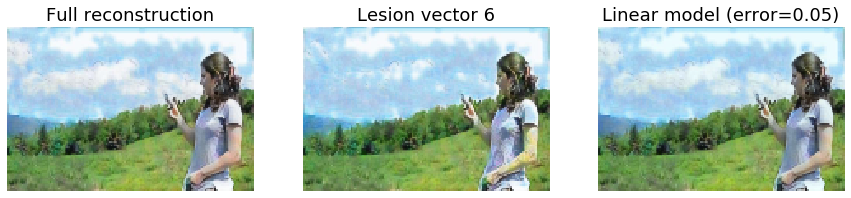

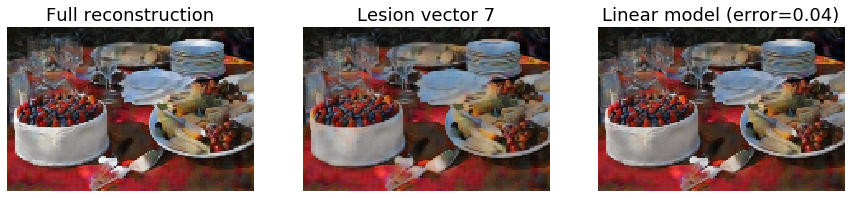

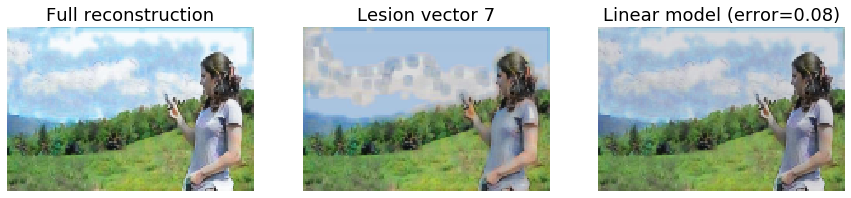

In [8]:
which_imgs = [25, -5]
for v in range(8):
    for i in which_imgs:
        current_fig = demo_image(all_org_ims, i, lesion_ind=v, figsize=(15,5))